In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/[]Nhan Dang/Question-Similarity

/content/drive/MyDrive/[]Nhan Dang/Question-Similarity


In [ ]:
!pip install sentence-transformers

     |████████████████████████████████| 92kB 3.0MB/s 
     |████████████████████████████████| 2.5MB 5.9MB/s 
     |████████████████████████████████| 1.2MB 34.7MB/s 
     |████████████████████████████████| 901kB 32.4MB/s 
     |████████████████████████████████| 3.3MB 37.3MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-cp37-none-any.whl size=126711 sha256=2fc82b6dde2dda72d79a7d854b1be60fd28b9c430b99222d9c9dcaf520e2981e
  Stored in directory: /root/.cache/pip/wheels/38/d2/98/d191289a877a34c68aa67e05179521e060f96394a3e9336be6
Successfully built sentence-transformers
ERROR: transformers 4.8.2 has requirement huggingface-hub==0.0.12, but you'll have huggingface-hub 0.0.13 which is incompatible.


In [ ]:
from sklearn.metrics import f1_score, accuracy_score

def calculate_performance(gold, prediction):
  return accuracy_score(gold, prediction), f1_score(gold, prediction), f1_score(gold, prediction, average='weighted')

In [ ]:
import pandas
from sentence_transformers import SentenceTransformer, util
import torch

### paraphrase-distilroberta-base-v2

In [ ]:
def calculate_similarity(a, b):
  return util.pytorch_cos_sim(a,b)[0][0]

In [ ]:
import pandas as pd
import tqdm

ensemble_test = pd.DataFrame()

In [ ]:
model_names = ["distilbert-base-nli-stsb-quora-ranking",
               "paraphrase-distilroberta-base-v2",
               "paraphrase-mpnet-base-v2",
               "paraphrase-MiniLM-L12-v2",
               "nli-mpnet-base-v2",
               ]

In [ ]:
model_names_v2 = [
                  "paraphrase-TinyBERT-L6-v2",
                  "paraphrase-MiniLM-L6-v2",
                  "stsb-mpnet-base-v2",
                  "distiluse-base-multilingual-cased-v1",
                  "stsb-distilroberta-base-v2",
                  "nli-roberta-base-v2",
                  "stsb-roberta-base-v2",
                  "nli-distilroberta-base-v2",
                  "distiluse-base-multilingual-cased-v2",
                  "average_word_embeddings_komninos",
                  "average_word_embeddings_glove.6B.300d",
                  "average_word_embeddings_levy_dependency",
]

In [ ]:
for model_name in tqdm.tqdm(model_names_v2):
  model = SentenceTransformer(model_name)
  df = pandas.read_csv("/content/drive/MyDrive/[]Nhan Dang/Question-Similarity/Quora dataset/test.csv")
  df['question2'] = df['question2'].apply(lambda x: str(x))
  df['question1'] = df['question1'].apply(lambda x: str(x))

  encode_question_1s = model.encode(list(df['question1']))
  encode_question_2s = model.encode(list(df['question2']))

  similarity = []
  for a,b in zip(encode_question_1s, encode_question_2s):
    similarity.append(calculate_similarity(a,b))

  similarity = [float(i) for i in similarity]
  ensemble_test[model_name] = similarity

  0%|          | 0/12 [00:00<?, ?it/s]

  8%|▊         | 1/12 [02:22<26:04, 142.25s/it]

 17%|█▋        | 2/12 [03:24<19:41, 118.15s/it]

 25%|██▌       | 3/12 [07:45<24:10, 161.17s/it]

 33%|███▎      | 4/12 [10:29<21:36, 162.03s/it]

 42%|████▏     | 5/12 [12:56<18:22, 157.55s/it]

 50%|█████     | 6/12 [17:20<18:55, 189.28s/it]

 58%|█████▊    | 7/12 [21:41<17:34, 210.91s/it]

 67%|██████▋   | 8/12 [24:04<12:41, 190.38s/it]

 75%|███████▌  | 9/12 [26:48<09:08, 182.74s/it]

 83%|████████▎ | 10/12 [27:19<04:34, 137.16s/it]

 92%|█████████▏| 11/12 [28:03<01:49, 109.20s/it]

100%|██████████| 12/12 [28:32<00:00, 142.71s/it]


In [ ]:
ensemble_test['is_duplicate'] = df['is_duplicate'] 

In [ ]:
ensemble_test

,distilbert-base-nli-stsb-quora-ranking,paraphrase-distilroberta-base-v2,paraphrase-mpnet-base-v2,paraphrase-MiniLM-L12-v2,nli-mpnet-base-v2,is_duplicate,paraphrase-TinyBERT-L6-v2,paraphrase-MiniLM-L6-v2,stsb-mpnet-base-v2,distiluse-base-multilingual-cased-v1,stsb-distilroberta-base-v2,nli-roberta-base-v2,stsb-roberta-base-v2,nli-distilroberta-base-v2,distiluse-base-multilingual-cased-v2,average_word_embeddings_komninos,average_word_embeddings_glove.6B.300d,average_word_embeddings_levy_dependency
0,0.479077,0.304895,0.329869,0.192072,0.387532,0,0.280528,0.171780,0.198834,0.528416,0.156183,0.390157,0.268852,0.289417,0.489771,0.728377,0.710391,0.734405
1,0.386410,-0.022418,-0.014013,0.077644,-0.005200,0,-0.012810,0.004880,0.037813,0.100403,-0.085058,-0.046604,-0.086722,-0.109506,0.086797,0.470429,0.240615,0.597804
2,0.889736,0.863636,0.916451,0.949759,0.874996,1,0.943447,0.916780,0.789130,0.974417,0.873653,0.914382,0.800173,0.932937,0.970609,0.977513,0.956949,0.976135
3,0.873512,0.792481,0.765808,0.814734,0.698909,1,0.792646,0.807548,0.599357,0.834017,0.741063,0.809396,0.754714,0.815641,0.831751,0.903415,0.794519,0.929591
4,0.450553,0.257116,0.471726,0.279785,0.411334,0,0.128143,0.228519,0.444488,0.359360,0.379900,0.449565,0.335461,0.424215,0.288930,0.812177,0.682294,0.811480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.851113,0.923780,0.863640,0.882839,0.769083,1,0.880825,0.880151,0.639083,0.848271,0.775556,0.883885,0.847219,0.809732,0.816946,0.748396,0.558455,0.770534
79996,0.378374,-0.066752,0.014404,-0.040359,0.111164,0,-0.033435,-0.080246,0.084292,0.129258,0.032222,0.175905,0.084698,0.098293,0.130256,0.526621,0.381420,0.579852
79997,0.534853,0.503596,0.493326,0.537362,0.368195,0,0.536350,0.503810,0.256200,0.489874,0.277599,0.458743,0.322115,0.462564,0.522346,0.722873,0.723159,0.760670
79998,0.790522,0.872482,0.884816,0.831500,0.858402,0,0.803216,0.844408,0.892485,0.780885,0.857847,0.857681,0.862279,0.844818,0.743201,0.847601,0.824150,0.856718


In [ ]:
ensemble_dev

,distilbert-base-nli-stsb-quora-ranking,paraphrase-distilroberta-base-v2,paraphrase-mpnet-base-v2,paraphrase-MiniLM-L12-v2,nli-mpnet-base-v2,is_duplicate,paraphrase-TinyBERT-L6-v2,paraphrase-MiniLM-L6-v2,stsb-mpnet-base-v2,distiluse-base-multilingual-cased-v1,stsb-distilroberta-base-v2,nli-roberta-base-v2,stsb-roberta-base-v2,nli-distilroberta-base-v2,distiluse-base-multilingual-cased-v2,average_word_embeddings_komninos,average_word_embeddings_glove.6B.300d,average_word_embeddings_levy_dependency
0,0.544100,0.618264,0.550103,0.609000,0.523918,0,0.570865,0.657407,0.526384,0.527860,0.579575,0.539914,0.446082,0.602854,0.526734,0.714137,0.599643,0.774971
1,0.812509,0.839274,0.876996,0.786541,0.840967,0,0.855921,0.829039,0.812819,0.828687,0.868345,0.871063,0.852300,0.903008,0.815038,0.925019,0.939881,0.929891
2,0.615574,0.329692,0.485622,0.526980,0.482157,0,0.423899,0.582808,0.399275,0.509738,0.400602,0.454010,0.418026,0.501455,0.443425,0.536464,0.469967,0.571822
3,0.946173,0.889334,0.906012,0.940151,0.926518,1,0.929959,0.934499,0.945137,0.946155,0.934571,0.909099,0.907029,0.934913,0.940351,0.927695,0.911830,0.940477
4,0.819606,0.796578,0.702246,0.733185,0.877632,1,0.854125,0.735889,0.811946,0.843886,0.752652,0.795138,0.686869,0.796939,0.851782,0.836575,0.825458,0.879878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.410751,0.075279,0.086293,-0.068055,0.265840,0,0.046602,-0.010060,0.263740,0.156570,0.293077,0.209570,0.186360,0.289473,0.136807,0.527785,0.381216,0.609567
79996,0.702626,0.641298,0.598952,0.508222,0.683183,0,0.479719,0.488608,0.588047,0.652952,0.721967,0.725794,0.822240,0.728183,0.649048,0.844175,0.739726,0.856613
79997,0.849879,0.623225,0.665673,0.601417,0.667061,0,0.648956,0.663012,0.666629,0.777730,0.583832,0.605346,0.651885,0.560192,0.731262,0.733629,0.749539,0.795389
79998,0.576884,0.499633,0.566354,0.592315,0.575716,0,0.531085,0.552362,0.535074,0.516426,0.493026,0.568403,0.519067,0.567463,0.505826,0.793260,0.726093,0.821676


In [ ]:
ensemble_train.to_csv("SBERT_encode_sentence.csv", index=False)

In [ ]:
ensemble_dev.to_csv("SBERT_encode_sentence_dev.csv", index=False)

In [ ]:
ensemble_test.to_csv("SBERT_encode_sentence_test.csv", index=False)

In [ ]:
ensemble_train = pd.read_csv("SBERT_encode_sentence.csv")
ensemble_train

,distilbert-base-nli-stsb-quora-ranking,paraphrase-distilroberta-base-v2,paraphrase-mpnet-base-v2,paraphrase-MiniLM-L12-v2,nli-mpnet-base-v2,is_duplicate,paraphrase-TinyBERT-L6-v2,paraphrase-MiniLM-L6-v2,stsb-mpnet-base-v2,distiluse-base-multilingual-cased-v1,stsb-distilroberta-base-v2,nli-roberta-base-v2,stsb-roberta-base-v2,nli-distilroberta-base-v2,distiluse-base-multilingual-cased-v2,average_word_embeddings_komninos,average_word_embeddings_glove.6B.300d,average_word_embeddings_levy_dependency
0,0.696001,0.573700,0.569865,0.528683,0.593448,0,0.677278,0.576335,0.726059,0.584884,0.593941,0.588562,0.599323,0.607856,0.610290,0.874871,0.651956,0.818624
1,0.644232,0.580639,0.639119,0.665531,0.751989,0,0.586621,0.690827,0.705231,0.794581,0.603158,0.676315,0.562753,0.671447,0.737434,0.847067,0.809579,0.877216
2,0.524185,0.329884,0.357737,0.372725,0.381514,0,0.424391,0.375748,0.401750,0.474788,0.397911,0.373088,0.251338,0.409317,0.493282,0.768955,0.676888,0.774744
3,0.797487,0.821957,0.829856,0.820814,0.842494,1,0.817135,0.840911,0.829541,0.864448,0.762922,0.806959,0.720074,0.800717,0.892830,0.819618,0.741882,0.874276
4,0.405980,0.222970,0.268923,0.360277,0.774101,0,0.167811,0.321182,0.502594,0.712492,0.448202,0.754384,0.560354,0.657452,0.730754,1.000000,1.000000,1.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244285,0.968404,0.924721,0.971645,0.958220,0.975229,1,0.961037,0.956967,0.970600,0.964372,0.863011,0.903813,0.903206,0.898462,0.965878,0.950473,0.927411,0.965316
244286,0.567139,0.586432,0.591516,0.550486,0.757204,0,0.686659,0.557353,0.557772,0.854385,0.636474,0.811767,0.604400,0.828141,0.882678,0.946330,0.906133,0.958616
244287,0.952039,0.947387,0.922788,0.910906,0.922571,1,0.928489,0.914483,0.924535,0.909789,0.923433,0.938677,0.931787,0.924841,0.887078,0.872990,0.941845,0.847171
244288,0.279280,0.014479,0.007940,-0.103434,0.076680,0,-0.016502,-0.132550,0.040603,0.143299,-0.007328,0.065641,0.044847,0.063082,0.081014,0.545603,0.348115,0.621314


In [ ]:
ensemble_dev = pd.read_csv("SBERT_encode_sentence_dev.csv")
ensemble_dev

,distilbert-base-nli-stsb-quora-ranking,paraphrase-distilroberta-base-v2,paraphrase-mpnet-base-v2,paraphrase-MiniLM-L12-v2,nli-mpnet-base-v2,is_duplicate,paraphrase-TinyBERT-L6-v2,paraphrase-MiniLM-L6-v2,stsb-mpnet-base-v2,distiluse-base-multilingual-cased-v1,stsb-distilroberta-base-v2,nli-roberta-base-v2,stsb-roberta-base-v2,nli-distilroberta-base-v2,distiluse-base-multilingual-cased-v2,average_word_embeddings_komninos,average_word_embeddings_glove.6B.300d,average_word_embeddings_levy_dependency
0,0.544100,0.618264,0.550103,0.609000,0.523918,0,0.570865,0.657407,0.526384,0.527860,0.579575,0.539914,0.446082,0.602854,0.526734,0.714137,0.599643,0.774971
1,0.812509,0.839274,0.876996,0.786541,0.840967,0,0.855921,0.829039,0.812819,0.828687,0.868345,0.871063,0.852300,0.903008,0.815038,0.925019,0.939881,0.929891
2,0.615574,0.329692,0.485622,0.526980,0.482157,0,0.423899,0.582808,0.399275,0.509738,0.400602,0.454010,0.418026,0.501455,0.443425,0.536464,0.469967,0.571822
3,0.946173,0.889334,0.906012,0.940151,0.926518,1,0.929959,0.934499,0.945137,0.946155,0.934571,0.909099,0.907029,0.934913,0.940351,0.927695,0.911830,0.940477
4,0.819606,0.796578,0.702246,0.733185,0.877632,1,0.854125,0.735889,0.811946,0.843886,0.752652,0.795138,0.686869,0.796939,0.851782,0.836575,0.825458,0.879878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.410751,0.075279,0.086293,-0.068055,0.265840,0,0.046602,-0.010060,0.263740,0.156570,0.293077,0.209570,0.186360,0.289473,0.136807,0.527785,0.381216,0.609567
79996,0.702626,0.641298,0.598952,0.508222,0.683183,0,0.479719,0.488608,0.588047,0.652952,0.721967,0.725794,0.822240,0.728183,0.649048,0.844175,0.739726,0.856613
79997,0.849879,0.623225,0.665673,0.601417,0.667061,0,0.648956,0.663012,0.666629,0.777730,0.583832,0.605346,0.651885,0.560192,0.731262,0.733629,0.749539,0.795389
79998,0.576884,0.499633,0.566354,0.592315,0.575716,0,0.531085,0.552362,0.535074,0.516426,0.493026,0.568403,0.519067,0.567463,0.505826,0.793260,0.726093,0.821676


In [ ]:
ensemble_test = pd.read_csv("SBERT_encode_sentence_test.csv")
ensemble_test

,distilbert-base-nli-stsb-quora-ranking,paraphrase-distilroberta-base-v2,paraphrase-mpnet-base-v2,paraphrase-MiniLM-L12-v2,nli-mpnet-base-v2,is_duplicate,paraphrase-TinyBERT-L6-v2,paraphrase-MiniLM-L6-v2,stsb-mpnet-base-v2,distiluse-base-multilingual-cased-v1,stsb-distilroberta-base-v2,nli-roberta-base-v2,stsb-roberta-base-v2,nli-distilroberta-base-v2,distiluse-base-multilingual-cased-v2,average_word_embeddings_komninos,average_word_embeddings_glove.6B.300d,average_word_embeddings_levy_dependency
0,0.479077,0.304895,0.329869,0.192072,0.387532,0,0.280528,0.171780,0.198834,0.528416,0.156183,0.390157,0.268852,0.289417,0.489771,0.728377,0.710391,0.734405
1,0.386410,-0.022418,-0.014013,0.077644,-0.005200,0,-0.012810,0.004880,0.037813,0.100403,-0.085058,-0.046604,-0.086722,-0.109506,0.086797,0.470429,0.240615,0.597804
2,0.889736,0.863636,0.916451,0.949759,0.874996,1,0.943447,0.916780,0.789130,0.974417,0.873653,0.914382,0.800173,0.932937,0.970609,0.977513,0.956949,0.976135
3,0.873512,0.792481,0.765808,0.814734,0.698909,1,0.792646,0.807548,0.599357,0.834017,0.741063,0.809396,0.754714,0.815641,0.831751,0.903415,0.794519,0.929591
4,0.450553,0.257116,0.471726,0.279785,0.411334,0,0.128143,0.228519,0.444488,0.359360,0.379900,0.449565,0.335461,0.424215,0.288930,0.812177,0.682294,0.811480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.851113,0.923780,0.863640,0.882839,0.769083,1,0.880825,0.880151,0.639083,0.848271,0.775556,0.883885,0.847219,0.809732,0.816946,0.748396,0.558455,0.770534
79996,0.378374,-0.066752,0.014404,-0.040359,0.111164,0,-0.033435,-0.080246,0.084292,0.129258,0.032222,0.175905,0.084698,0.098293,0.130256,0.526621,0.381420,0.579852
79997,0.534853,0.503596,0.493326,0.537362,0.368195,0,0.536350,0.503810,0.256200,0.489874,0.277599,0.458743,0.322115,0.462564,0.522346,0.722873,0.723159,0.760670
79998,0.790522,0.872482,0.884816,0.831500,0.858402,0,0.803216,0.844408,0.892485,0.780885,0.857847,0.857681,0.862279,0.844818,0.743201,0.847601,0.824150,0.856718


In [ ]:
columns = ensemble_train.columns
columns = columns.to_list()
columns = [i for i in columns if not (i=='is_duplicate') ]
columns = [i for i in columns if i not in ['average_word_embeddings_komninos',
                                           'average_word_embeddings_glove.6B.300d',
                                           'average_word_embeddings_levy_dependency']]
columns

['distilbert-base-nli-stsb-quora-ranking',
 'paraphrase-distilroberta-base-v2',
 'paraphrase-mpnet-base-v2',
 'paraphrase-MiniLM-L12-v2',
 'nli-mpnet-base-v2',
 'paraphrase-TinyBERT-L6-v2',
 'paraphrase-MiniLM-L6-v2',
 'stsb-mpnet-base-v2',
 'distiluse-base-multilingual-cased-v1',
 'stsb-distilroberta-base-v2',
 'nli-roberta-base-v2',
 'stsb-roberta-base-v2',
 'nli-distilroberta-base-v2',
 'distiluse-base-multilingual-cased-v2']

In [ ]:
def re_cal(i):
  if i<0:
    return i*(-1.0)
  else: return i

In [ ]:
for k in columns:
  ensemble_dev[k] = [re_cal(i) for i in ensemble_dev[k]]

In [ ]:
ensemble_train

,distilbert-base-nli-stsb-quora-ranking,paraphrase-distilroberta-base-v2,paraphrase-mpnet-base-v2,paraphrase-MiniLM-L12-v2,nli-mpnet-base-v2,is_duplicate,paraphrase-TinyBERT-L6-v2,paraphrase-MiniLM-L6-v2,stsb-mpnet-base-v2,distiluse-base-multilingual-cased-v1,stsb-distilroberta-base-v2,nli-roberta-base-v2,stsb-roberta-base-v2,nli-distilroberta-base-v2,distiluse-base-multilingual-cased-v2,average_word_embeddings_komninos,average_word_embeddings_glove.6B.300d,average_word_embeddings_levy_dependency
0,0.696001,0.573700,0.569865,0.528683,0.593448,0,0.677278,0.576335,0.726059,0.584884,0.593941,0.588562,0.599323,0.607856,0.610290,0.874871,0.651956,0.818624
1,0.644232,0.580639,0.639119,0.665531,0.751989,0,0.586621,0.690827,0.705231,0.794581,0.603158,0.676315,0.562753,0.671447,0.737434,0.847067,0.809579,0.877216
2,0.524185,0.329884,0.357737,0.372725,0.381514,0,0.424391,0.375748,0.401750,0.474788,0.397911,0.373088,0.251338,0.409317,0.493282,0.768955,0.676888,0.774744
3,0.797487,0.821957,0.829856,0.820814,0.842494,1,0.817135,0.840911,0.829541,0.864448,0.762922,0.806959,0.720074,0.800717,0.892830,0.819618,0.741882,0.874276
4,0.405980,0.222970,0.268923,0.360277,0.774101,0,0.167811,0.321182,0.502594,0.712492,0.448202,0.754384,0.560354,0.657452,0.730754,1.000000,1.000000,1.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244285,0.968404,0.924721,0.971645,0.958220,0.975229,1,0.961037,0.956967,0.970600,0.964372,0.863011,0.903813,0.903206,0.898462,0.965878,0.950473,0.927411,0.965316
244286,0.567139,0.586432,0.591516,0.550486,0.757204,0,0.686659,0.557353,0.557772,0.854385,0.636474,0.811767,0.604400,0.828141,0.882678,0.946330,0.906133,0.958616
244287,0.952039,0.947387,0.922788,0.910906,0.922571,1,0.928489,0.914483,0.924535,0.909789,0.923433,0.938677,0.931787,0.924841,0.887078,0.872990,0.941845,0.847171
244288,0.279280,0.014479,0.007940,-0.103434,0.076680,0,-0.016502,-0.132550,0.040603,0.143299,-0.007328,0.065641,0.044847,0.063082,0.081014,0.545603,0.348115,0.621314


In [ ]:
X_train = ensemble_train[columns]
y_train = ensemble_train['is_duplicate']

In [ ]:
X_dev = ensemble_dev[columns]
y_dev = ensemble_dev['is_duplicate']

In [ ]:
X_test = ensemble_test[columns]
y_test = ensemble_test['is_duplicate']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred = DT.predict(X_dev)

In [ ]:
calculate_performance(y_dev, pred)

(0.86655, 0.818404490559619, 0.8665737849567436)

In [ ]:
pred = DT.predict(X_test)
calculate_performance(y_test, pred)

(0.868175, 0.8217858591320805, 0.8682173292168516)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred = svc_model.predict(X_dev)

In [ ]:
calculate_performance(y_dev, pred)

(0.9127375, 0.8848342874111222, 0.9132644948585706)

In [ ]:
pred = svc_model.predict(X_test)
calculate_performance(y_test, pred)

(0.911625, 0.8840945604773928, 0.9121572444116915)

Lúc chưa chỉnh thành tất cả dương: Dev f1=88.57

Sau khi dương hết Dev f1= 88.58

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = forest.predict(X_dev)

In [ ]:
calculate_performance(y_dev, y_pred)

(0.914325, 0.8856179700277027, 0.9146640526332187)

In [ ]:
y_pred = forest.predict(X_test)
calculate_performance(y_test, y_pred)

(0.913225, 0.8849633778543731, 0.9135829000054968)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
eval_set = [(X_train, y_train), (X_dev, y_dev)]
 
params = {}
params["objective"] = "binary:logistic"
params["eval_metric"] = "logloss"
params["eta"] = 0.1
params["max_depth"] = 6
params["min_child_weight"] = 1
params["gamma"] = 0
params["subsample"] = 0.8
params["colsample_bytree"] = 0.9
params["scale_pos_weight"] = 0.3632
params["tree_method"] = "gpu_hist"  # 使用GPU加速的直方图算法
params['max_bin'] = 256

# fit model no training data 
model = XGBClassifier(max_depth=6, subsample=0.8) 
model.fit(X_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=True)
 
#print(model)

[0]	validation_0-auc:0.964555	validation_1-auc:0.964237
[1]	validation_0-auc:0.965331	validation_1-auc:0.965178
[2]	validation_0-auc:0.966114	validation_1-auc:0.965916
[3]	validation_0-auc:0.966281	validation_1-auc:0.966096
[4]	validation_0-auc:0.966463	validation_1-auc:0.966237
[5]	validation_0-auc:0.966635	validation_1-auc:0.966419
[6]	validation_0-auc:0.966739	validation_1-auc:0.966493
[7]	validation_0-auc:0.966843	validation_1-auc:0.966605
[8]	validation_0-auc:0.966922	validation_1-auc:0.966704
[9]	validation_0-auc:0.967024	validation_1-auc:0.966781
[10]	validation_0-auc:0.967125	validation_1-auc:0.966838
[11]	validation_0-auc:0.967223	validation_1-auc:0.966901
[12]	validation_0-auc:0.967342	validation_1-auc:0.966985
[13]	validation_0-auc:0.96741	validation_1-auc:0.967053
[14]	validation_0-auc:0.967457	validation_1-auc:0.967081
[15]	validation_0-auc:0.967525	validation_1-auc:0.967158
[16]	validation_0-auc:0.967616	validation_1-auc:0.967218
[17]	validation_0-auc:0.967689	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
y_pred = model.predict(X_dev) 
predictions = [round(value) for value in y_pred]

calculate_performance(y_dev, predictions)

(0.9146875, 0.8863352485635771, 0.9150576634547999)

In [ ]:
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]

calculate_performance(y_test, predictions)

(0.9127375, 0.8846744750797085, 0.9131463122001217)

Có âm dương: f1=88.78 acc=91.59

Dướng hết f1=88.79 acc=91.61

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
test = SelectKBest(score_func=chi2, k=16)
fit = test.fit(X_train, y_train)
fit.scores_

array([8971.79042203, 8587.98801802, 7441.56805029, 7812.9320833 ,
       5261.27567845, 8476.64586362, 7261.24070842, 7183.02477619,
       5318.03804404, 6432.61447148, 4514.06851146, 6741.10046128,
       4465.43818325, 5139.3247843 , 1059.71318887, 2169.72189944,
        622.25357619])

In [ ]:
X_train_new=test.fit_transform(X_train, y_train)

In [ ]:
X_dev_new = test.transform(X_dev)

In [ ]:
model_rfr = RandomForestClassifier()
model_rfr.fit(X_train_new, y_train)
predict_y_dev = model_rfr.predict(X_dev_new)
calculate_performance(y_dev, predict_y_dev)

(0.9158, 0.887613454351308)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
def set_label(similarity, u):
  predicts = []
  for i in similarity:
    if i>=u: 
      predicts.append(1)
    else: 
      predicts.append(0)
  return predicts

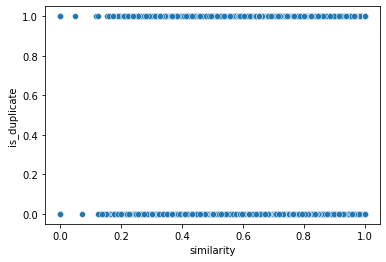

In [ ]:
pretrained_model = "average_word_embeddings_levy_dependency"

local_pretrained = pd.DataFrame(columns = ["smilarity", "is_duplicate"])
local_pretrained['similarity'] = ensemble_train[pretrained_model]
local_pretrained['is_duplicate'] = ensemble_train['is_duplicate']

sns.scatterplot(data = local_pretrained, x='similarity', y='is_duplicate')
plt.show()

In [ ]:
u_tmp, f1_max = 0.4, 0.0
while u_tmp<=1.0:
  predicts = set_label(local_pretrained['similarity'], u_tmp)

  acc, f1, f1_weighted = calculate_performance(local_pretrained['is_duplicate'], predicts)
  if f1>f1_max:
    f1_max, u = f1, u_tmp
  u_tmp += 0.01
print(u)

dev_tmp = pd.DataFrame(columns = ["smilarity", "is_duplicate"])
dev_tmp['similarity'] = ensemble_dev[pretrained_model]
dev_tmp['is_duplicate'] = ensemble_dev['is_duplicate']

test_tmp = pd.DataFrame(columns = ["smilarity", "is_duplicate"])
test_tmp['similarity'] = ensemble_test[pretrained_model]
test_tmp['is_duplicate'] = ensemble_test['is_duplicate']

predicts = set_label(dev_tmp['similarity'], u)
acc, f1, f1_weighted = calculate_performance(dev_tmp['is_duplicate'], predicts)
print(f"DEV: Accuracy: {acc}\tF1-score: {f1}", f1_weighted)

predicts = set_label(test_tmp['similarity'], u)
acc, f1, f1_weighted = calculate_performance(test_tmp['is_duplicate'], predicts)
print(f"TEST': Accuracy: {acc}\tF1-score: {f1}", f1_weighted)

0.8100000000000004
DEV: Accuracy: 0.6103375	F1-score: 0.611546561327867 0.6100114138054559
TEST': Accuracy: 0.6128125	F1-score: 0.6158997061121237 0.6119737954550792


In [ ]:
import numpy as np

In [ ]:
train_tmp = pd.DataFrame(columns = ["smilarity", "is_duplicate"])
train_tmp['similarity'] = ensemble_train[pretrained_model]
train_tmp['is_duplicate'] = ensemble_train['is_duplicate']

dev_tmp = pd.DataFrame(columns = ["smilarity", "is_duplicate"])
dev_tmp['similarity'] = ensemble_dev[pretrained_model]
dev_tmp['is_duplicate'] = ensemble_dev['is_duplicate']

X_train = train_tmp['similarity'].tolist()
X_train = [[i] for i in X_train]
X_train = np.array(X_train)

X_dev = dev_tmp['similarity'].tolist()
X_dev = [[i] for i in X_dev]
X_dev = np.array(X_dev)

eval_set = [(X_train, train_tmp['is_duplicate']), (X_dev, dev_tmp['is_duplicate'])]

model = XGBClassifier(max_depth=6, subsample=0.8) 
model.fit(X_train, train_tmp['is_duplicate'], eval_metric="auc", eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.962086	validation_1-auc:0.962605
[1]	validation_0-auc:0.962201	validation_1-auc:0.962692
[2]	validation_0-auc:0.962337	validation_1-auc:0.962798
[3]	validation_0-auc:0.962449	validation_1-auc:0.962902
[4]	validation_0-auc:0.962482	validation_1-auc:0.962906
[5]	validation_0-auc:0.962515	validation_1-auc:0.962923
[6]	validation_0-auc:0.962545	validation_1-auc:0.962947
[7]	validation_0-auc:0.962561	validation_1-auc:0.962946
[8]	validation_0-auc:0.962607	validation_1-auc:0.962967
[9]	validation_0-auc:0.962617	validation_1-auc:0.962992
[10]	validation_0-auc:0.962636	validation_1-auc:0.962988
[11]	validation_0-auc:0.962646	validation_1-auc:0.963
[12]	validation_0-auc:0.962661	validation_1-auc:0.962998
[13]	validation_0-auc:0.962671	validation_1-auc:0.963
[14]	validation_0-auc:0.962686	validation_1-auc:0.962998
[15]	validation_0-auc:0.962713	validation_1-auc:0.96298
[16]	validation_0-auc:0.962727	validation_1-auc:0.96298
[17]	validation_0-auc:0.962739	validation_1-auc:0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)